# Pytorch Tutorial 01
Divide train set and test set. View data. Check label's percentage in total.

## 1. Check library.

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

## 2. Download and divide dataset in one line.

> "" -> Local dataset address.Torch will download MNIST dataset to "address"
>
> train=True -> whether this subset is train set.
>
> download=True -> ?
>
> transform = transforms.Compose([transforms.ToTensor()]) -> Transform data type.

In [2]:
train = datasets.MNIST("",train=True,download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False,download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

## 3. Adjust train set in to small batches and shuffle them.

We want to train the whole dataset once, but its impossible. Instead, we train one batch a time. 

Model will find the shortest way to achieve goal, we need to shuffle the batch to let model know the question is not that easy.

In [3]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

## 4. What is data in trainset looks like?

Including two parts, image data and label data.

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

## 5. View image and corresponding label

In [5]:
x, y = data[0][0],data[1][0]
print(y)

tensor(1)


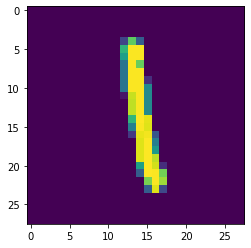

In [8]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

View The size of the image. Notice there is a 1 dimension in the front.

In [7]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


## 6. Percentage of each label

Using a dictionary to count the number of each label.

In [11]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [13]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
